In [1]:
import pandas as pd
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import os
plt.style.use("dark_background")

class Graficos:
    def __init__(self):
        self.estrellas = None
        self.dataframes_constelaciones = None
        
    def cargar_datos(self):
        path = "/kaggle/input/constelaciones-and-estrellas/stars.txt"
        archivo = open(path, 'r')  # Abre el archivo en modo de lectura
        lineas = archivo.readlines()  # Lee todas las líneas del archivo y las guarda en una lista
        archivo.close()  # Cierra el archivo

        data = []
        for linea in lineas:
            valores = linea.split()  # Divide la línea en una lista de valores separados por espacios
            valor1 = float(valores[0])
            valor2 = float(valores[1])
            valor3 = float(valores[2])
            valor4 = int(valores[3])
            valor5 = float(valores[4])
            valor6 = int(valores[5])
            nombre = ""
            segundo_nombre = ""
            if len(valores) > 6:
                nombres = " ".join(valores[6:]).split(";")
                nombre = nombres[0]
                if len(nombres) > 1:
                    segundo_nombre = nombres[1]
            data.append([valor1, valor2, valor3, valor4, valor5, valor6, nombre, segundo_nombre])

        columnas = ['Coordenada X', 'Coordenada Y', 'Coordenada Z', 'ID', 'Magnitud', 'Harvard Revised', 'Nombre', 'Segundo Nombre']
        self.estrellas = pd.DataFrame(data, columns=columnas)
        self.estrellas["Segundo Nombre"] = self.estrellas["Segundo Nombre"].str.strip()

        CONSTELLATIONS = "/kaggle/input/constelaciones-and-estrellas"
        archivos_constelaciones = ["Boyero.txt", "Casiopea.txt", "Cazo.txt", "Cygnet.txt", "Geminis.txt", "Hydra.txt", "OsaMayor.txt", "OsaMenor.txt"]
        self.dataframes_constelaciones = []

        for archivo in archivos_constelaciones:
            ruta_archivo = os.path.join(CONSTELLATIONS, archivo)

            with open(ruta_archivo, 'r') as f:
                lineas = f.readlines()

            conexiones = [linea.strip().split(',') for linea in lineas]
            df_constelacion = pd.DataFrame(conexiones, columns=['Estrella 1', 'Estrella 2'])
            self.dataframes_constelaciones.append(df_constelacion)
        
    def graficar_estrellas(self):
        plt.figure(figsize=(10, 10))
        plt.scatter(self.estrellas["Coordenada X"], self.estrellas["Coordenada Y"], marker="*", s=self.estrellas["Magnitud"])
        plt.xticks([])
        plt.yticks([])
        file_path = 'estrellas_plot.png'
        plt.savefig(file_path, facecolor='black', bbox_inches='tight', pad_inches=0)
        return file_path

                

    def graficar_constelacion(self, indice_constelacion):
        plt.figure(figsize=(10, 10))
        plt.scatter(self.estrellas["Coordenada X"], self.estrellas["Coordenada Y"], marker="*", s= .1)
        plt.xticks([])
        plt.yticks([])

        colores_constelaciones = ['blue', 'white', 'red', 'green', 'purple', 'skyblue', 'maroon', '#800080']
        nombres_constelaciones = ['Boyero', 'Casiopea', 'Cazo', 'Cygnet', 'Geminis', 'Hydra', 'OsaMayor', 'OsaMenor']

        df_constelacion = self.dataframes_constelaciones[indice_constelacion]
        color = colores_constelaciones[indice_constelacion]
        nombre_constelacion = nombres_constelaciones[indice_constelacion]

        for _, row in df_constelacion.iterrows():
            estrella1 = row["Estrella 1"]
            estrella2 = row["Estrella 2"]

            if (estrella1 in self.estrellas["Nombre"].values or estrella1 in self.estrellas["Segundo Nombre"].values) and \
               (estrella2 in self.estrellas["Nombre"].values or estrella2 in self.estrellas["Segundo Nombre"].values):

                x1 = self.estrellas.loc[(self.estrellas["Nombre"] == estrella1) | (self.estrellas["Segundo Nombre"] == estrella1), "Coordenada X"].values[0]
                y1 = self.estrellas.loc[(self.estrellas["Nombre"] == estrella1) | (self.estrellas["Segundo Nombre"] == estrella1), "Coordenada Y"].values[0]
                x2 = self.estrellas.loc[(self.estrellas["Nombre"] == estrella2) | (self.estrellas["Segundo Nombre"] == estrella2), "Coordenada X"].values[0]
                y2 = self.estrellas.loc[(self.estrellas["Nombre"] == estrella2) | (self.estrellas["Segundo Nombre"] == estrella2), "Coordenada Y"].values[0]

                plt.plot([x1, x2], [y1, y2], color=color, linewidth=1)

        plt.text(0.05, 0.95, nombre_constelacion, transform=plt.gca().transAxes, fontsize=12)
        file_path = 'constelacion_plot.png'
        plt.savefig(file_path, facecolor='black', bbox_inches='tight', pad_inches=0)
        return file_path

    def graficar_todas(self):
        plt.figure(figsize=(10, 10))
        plt.scatter(self.estrellas["Coordenada X"], self.estrellas["Coordenada Y"], marker=".", s=0.1)
        plt.xticks([])
        plt.yticks([])

        colores_constelaciones = ['blue', 'white', 'red', 'green', 'purple', 'skyblue', 'maroon', '#800080']
        nombres_constelaciones = ['Boyero', 'Casiopea', 'Cazo', 'Cygnet', 'Geminis', 'Hydra', 'OsaMayor', 'OsaMenor']
        legend_lines = [Line2D([0], [0], color=color, lw=2) for color in colores_constelaciones]

        for i, df_constelacion in enumerate(self.dataframes_constelaciones):
            color = colores_constelaciones[i % len(colores_constelaciones)]
            nombre_constelacion = nombres_constelaciones[i % len(nombres_constelaciones)]

            for _, row in df_constelacion.iterrows():
                estrella1 = row["Estrella 1"]
                estrella2 = row["Estrella 2"]

                if (estrella1 in self.estrellas["Nombre"].values or estrella1 in self.estrellas["Segundo Nombre"].values) and \
                   (estrella2 in self.estrellas["Nombre"].values or estrella2 in self.estrellas["Segundo Nombre"].values):

                    x1 = self.estrellas.loc[(self.estrellas["Nombre"] == estrella1) | (self.estrellas["Segundo Nombre"] == estrella1), "Coordenada X"].values[0]
                    y1 = self.estrellas.loc[(self.estrellas["Nombre"] == estrella1) | (self.estrellas["Segundo Nombre"] == estrella1), "Coordenada Y"].values[0]
                    x2 = self.estrellas.loc[(self.estrellas["Nombre"] == estrella2) | (self.estrellas["Segundo Nombre"] == estrella2), "Coordenada X"].values[0]
                    y2 = self.estrellas.loc[(self.estrellas["Nombre"] == estrella2) | (self.estrellas["Segundo Nombre"] == estrella2), "Coordenada Y"].values[0]

                    plt.plot([x1, x2], [y1, y2], color=color, linewidth=1)

        plt.legend(legend_lines, nombres_constelaciones, facecolor='white', edgecolor='black')
        file_path = 'constelaciones.png'
        plt.savefig(file_path, facecolor='black', bbox_inches='tight', pad_inches=0)
        return file_path


# BOT

In [2]:
pip install telebot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.0/232.0 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyTelegramBotAPI: filename=pyTelegramBotAPI-4.12.0-py3-none-any.whl size=213969 sha256=292e2489d286fed93f73019f39a983aa7a0e07cd46fe0086b6aa772ee4c13ae0
  Stored in directory: /root/.cache/pip/wheels/7e/ba/82/f3ab5bc48525778633bccc741c0424677ed3435736221819f4
Successfully built pyTelegramBotAPI
Note: you may need to restart the kernel to use updated packages.


/opt/conda/lib/python3.10/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


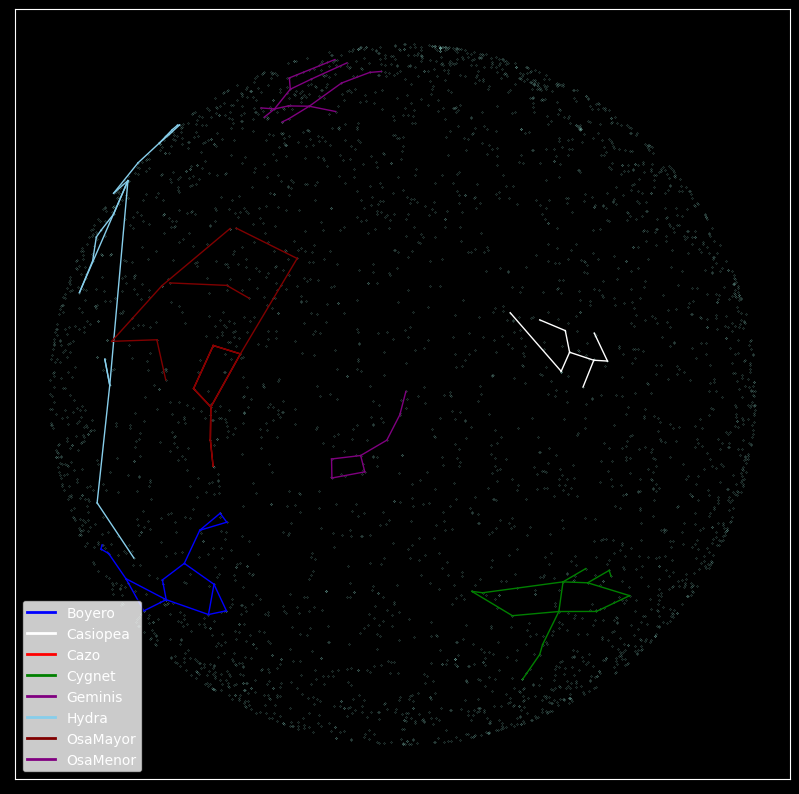

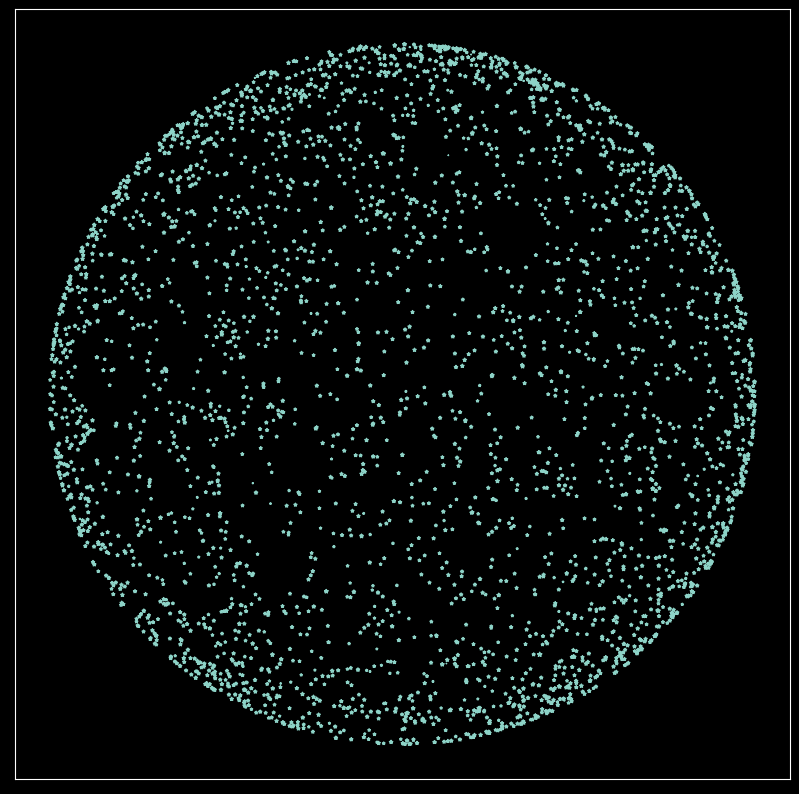

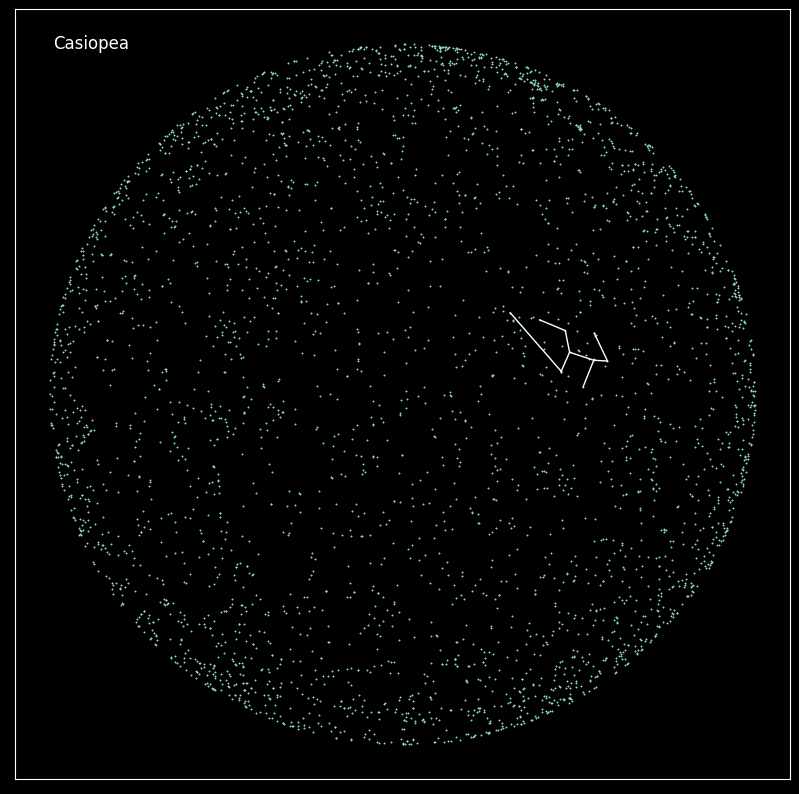

In [3]:
import telebot

# Crea una instancia del bot de Telegram
bot = telebot.TeleBot('TOKEN OF BOT')
# borre el token del bot por si aca xd


# Crea una instancia de la clase Graficos
graficos = Graficos()

# Carga los datos al iniciar el bot
graficos.cargar_datos()

# Maneja el comando /start
@bot.message_handler(commands=['start'])
def handle_start(message):
    bot.reply_to(message, "¡Hola! Soy un bot de gráficos de constelaciones. Elige una opción:\n\n"
                          "1. /graficar_todas - Graficar todas las constelaciones.\n"
                          "2. /graficar_estrellas - Graficar todas las estrellas.\n"
                          "3. /graficar_constelacion - Graficar una constelación específica.")

# Maneja el comando /graficar_todas
@bot.message_handler(commands=['graficar_todas'])
def handle_graficar_todas(message):
    file_path = graficos.graficar_todas()
    with open(file_path, 'rb') as photo:
        bot.send_photo(message.chat.id, photo)   

# Maneja el comando /graficar_estrellas
@bot.message_handler(commands=['graficar_estrellas'])
def handle_graficar_estrellas(message):
    file_path = graficos.graficar_estrellas()
    with open(file_path, 'rb') as photo:
        bot.send_photo(message.chat.id, photo)
        
# Maneja el comando /graficar_constelacion
@bot.message_handler(commands=['graficar_constelacion'])
def handle_graficar_constelacion(message):
    bot.reply_to(message, "Por favor, ingresa un índice del 1 al 8: \n1.  Boyero, \n2.  Casiopea, \n4.  Cygnet \n5.  Geminis \n6.  Hydra \n7.  Osa Mayor \n8.  Osa Meno")
    bot.register_next_step_handler(message, handle_constelacion_index)

def handle_constelacion_index(message):
    try:
        index = int(message.text)
        file_path = graficos.graficar_constelacion(index)
        with open(file_path, 'rb') as photo:
            bot.send_photo(message.chat.id, photo)
    except ValueError:
        bot.reply_to(message, "El índice ingresado no es válido. Por favor, intenta nuevamente.")

        

# Ejecuta el bot
bot.polling()
